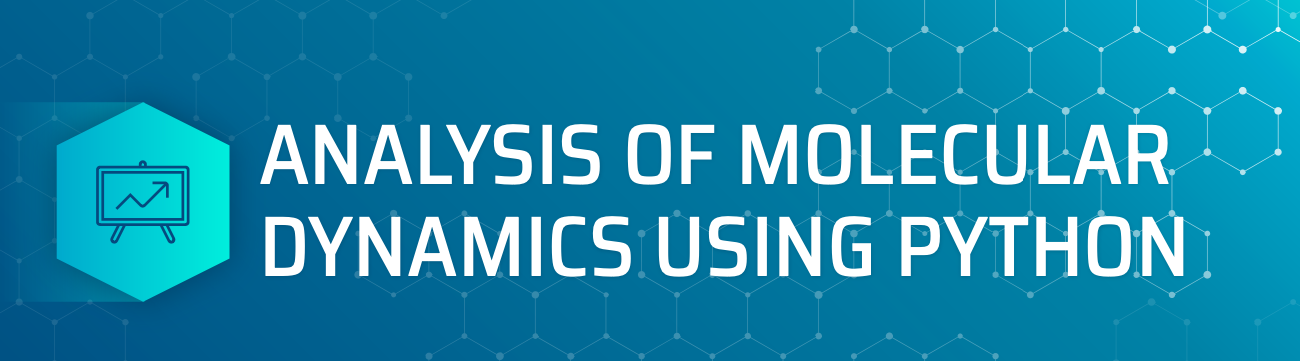

Presented by Lucy Jiménez. Adapted and inspired by [MDAnalysis](https://www.mdanalysis.org/docs/documentation_pages/overview.html).

# 1. Installing MDAnalysis

In [1]:
!pip install --upgrade MDAnalysis[analysis]

Requirement already up-to-date: MDAnalysis[analysis] in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.0)
     |████████████████████████████████| 6.8 MB 5.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=600b03af476eeaad2dc1712a77d0b00d46d3c10772d31c0c1778f363af1d6b0d
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
!pip install --upgrade MDAnalysisTests

     |████████████████████████████████| 47.7 MB 42.8 MB/s eta 0:00:01
     |████████████████████████████████| 270 kB 27.6 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 27.3 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 2.8 MB/s  eta 0:00:01
     |████████████████████████████████| 99 kB 14.8 MB/s eta 0:00:01
  Created wheel for MDAnalysisTests: filename=MDAnalysisTests-1.0.0-py2.py3-none-any.whl size=47955245 sha256=f4cff7a948ce6301e1ab1d86a86f2f1057c8b5e04189150cdb3b3f5aaa667f62
  Stored in directory: /home/jovyan/.cache/pip/wheels/f0/58/3d/f4d2f56341e54af77657939a2076403c3575f14acea4159d9b
Successfully built MDAnalysisTests


## Installing nglview

In [3]:
!pip install nglview

In [4]:
!jupyter nbextension enable --py --sys-prefix nglview

Enabling notebook extension nglview-js-widgets/extension...
      - Validating: OK



# 2. Loading MDAnalysis and other libraries

In [5]:
import MDAnalysis as mda

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import nglview as nv

## MDA version

In [6]:
print(mda.__version__)

1.0.0


## 2.1. Checking tests datafiles

Let's use 2 examples of molecular systems that come in MDAnalysis.

__Example 1.__ The PSF and DCD file are a closed-form-to-open-form transition of Adenylate Kinase (from [Beckstein2009](https://www.sciencedirect.com/science/article/abs/pii/S0022283609011164?via%3Dihub))

In [7]:
from MDAnalysisTests.datafiles import PSF, DCD
u = mda.Universe(PSF, DCD)

/srv/conda/envs/notebook/lib/python3.7/site-packages/MDAnalysisTests/__init__.py:126: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [8]:
print(u.atoms)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>


In [9]:
print(u.trajectory)

<DCDReader /srv/conda/envs/notebook/lib/python3.7/site-packages/MDAnalysisTests/data/adk_dims.dcd with 98 frames of 3341 atoms>


__Example 2.__ The PDB ans XTC file are ten frames from a Gromacs simulation of AdK solvated in TIP4P water with the OPLS/AA force field.

### <font color='blue'>__Exercise 1:__</font>  

Load topology and trajectory for the simulation of AdK solvated. Use "v" to call the universe of this simulations.
* How many atoms are there? 
* Check the number of frames in the trajectory

In [75]:
from MDAnalysisTests.datafiles import PDB, XTC
v = mda.Universe(PDB, XTC)

In [74]:
print(v.atoms)

<AtomGroup [<Atom 1: N of type N of resname MET, resid 1 and segid SYSTEM and altLoc >, <Atom 2: H1 of type H of resname MET, resid 1 and segid SYSTEM and altLoc >, <Atom 3: H2 of type H of resname MET, resid 1 and segid SYSTEM and altLoc >, ..., <Atom 47679: NA of type NA of resname NA+, resid 11300 and segid SYSTEM and altLoc >, <Atom 47680: NA of type NA of resname NA+, resid 11301 and segid SYSTEM and altLoc >, <Atom 47681: NA of type NA of resname NA+, resid 11302 and segid SYSTEM and altLoc >]>


In [12]:
print(v.trajectory)

<XTCReader /srv/conda/envs/notebook/lib/python3.7/site-packages/MDAnalysisTests/data/adk_oplsaa.xtc with 10 frames of 47681 atoms>



# 3. Reading files input

Reading files input from a GROMACS XTC trajectory.

In [13]:
# u_gromacs = mda.Universe('topology.gro', 'trajectory.xtc')

Loads two CHARMM/NAMD DCD files and concatenates them

In [14]:
# u_charmm = mda.Universe('topology.psf', 'trajectory1.dcd', 'trajectory2.dcd')

Reading files input from a AMBER CRD trajectory.

In [15]:
# u_amber = mda.Universe('top.prmtop', 'traj.crd', format='TRJ')

## How to use it?

Loading my AMBER trajectory for the simulation of *Asp*RedAm from the fungus *Aspergillus oryzae*:

In [16]:
u_1 = mda.Universe('datafiles/structure.pdb','datafiles/short_traj.crd', dt = 0.020, format='TRJ')
ref = mda.Universe('datafiles/structure.pdb')   # reference structure
u_1.trajectory

<TRJReader datafiles/short_traj.crd with 101 frames of 9010 atoms>

In [17]:
print(ref)

<Universe with 9010 atoms>


In [18]:
print(u_1, u_1.trajectory.dt, u_1.trajectory.n_frames)

<Universe with 9010 atoms> 0.02 101


In [19]:
prot = u_1.select_atoms('protein')
view_md_prot = nv.show_mdanalysis(prot)
view_md_prot

NGLWidget(max_frame=100)

### <font color='blue'>__Exercise 2:__</font>  
Load your own topology and trajectory. 
* How many atoms are there? 
* Check the number of frames in the trajectory. 
* Visualize your simulation!


# 4. Selection commands

## 4.1 Usual selections

Atoms, residues, range of residues. [More options](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html)

In [20]:
u = mda.Universe(PSF, DCD)
print(u)

<Universe with 3341 atoms>


In [21]:
print(u.atoms)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>


Selecting a segment as the segid given in the topology.

In [22]:
seg_name = u.select_atoms("segid 4AKE")

Selecting atoms and residues range.

In [23]:
list(u.atoms[:5])

[<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>,
 <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 4: HT3 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>]

In [37]:
list(u.select_atoms("resid 2:4"))

[<Atom 20: N of type 54 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 21: HN of type 1 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 22: CA of type 22 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 23: HA of type 6 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 24: CB of type 23 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 25: HB1 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 26: HB2 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 27: CG of type 23 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 28: HG1 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 29: HG2 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 30: CD of type 23 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 31: HD1 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 32: HD2 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 33: NE of type 57 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 34: HE of type 2 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 35: CZ 

In [25]:
ten = u.select_atoms("resid 20:30")
print(ten)
ten_view = nv.show_mdanalysis(ten,gui=True)
ten_view

<AtomGroup [<Atom 282: N of type 54 of resname ILE, resid 20 and segid 4AKE>, <Atom 283: HN of type 1 of resname ILE, resid 20 and segid 4AKE>, <Atom 284: CA of type 22 of resname ILE, resid 20 and segid 4AKE>, ..., <Atom 460: HG1 of type 1 of resname SER, resid 30 and segid 4AKE>, <Atom 461: C of type 20 of resname SER, resid 30 and segid 4AKE>, <Atom 462: O of type 70 of resname SER, resid 30 and segid 4AKE>]>


NGLWidget(max_frame=97)

Selecting by residue name.

In [26]:
list(u.select_atoms("resname LYS"))

[<Atom 175: N of type 54 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 176: HN of type 1 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 177: CA of type 22 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 178: HA of type 6 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 179: CB of type 23 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 180: HB1 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 181: HB2 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 182: CG of type 23 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 183: HG1 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 184: HG2 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 185: CD of type 23 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 186: HD1 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 187: HD2 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 188: CE of type 23 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 189: HE1 of type 3 of resname LYS, resid 13 

Selecting by atom name.

In [27]:
calphas = u.select_atoms("name CA")
print(calphas)

<AtomGroup [<Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>, <Atom 22: CA of type 22 of resname ARG, resid 2 and segid 4AKE>, <Atom 46: CA of type 22 of resname ILE, resid 3 and segid 4AKE>, ..., <Atom 3298: CA of type 22 of resname ILE, resid 212 and segid 4AKE>, <Atom 3317: CA of type 22 of resname LEU, resid 213 and segid 4AKE>, <Atom 3336: CA of type 23 of resname GLY, resid 214 and segid 4AKE>]>


Subselections.

In [49]:
nterm = u.select_atoms('segid 4AKE and name N')[0]  # can access structure via segid (s4AKE) and atom name
cterm = u.select_atoms('segid 4AKE and name C')[-1]  # ... takes the last atom named 'C'

print(nterm)
print(cterm)

<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>
<Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>


In [50]:
list(u.select_atoms("resname MET and (name CA)"))

[<Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>,
 <Atom 303: CA of type 22 of resname MET, resid 21 and segid 4AKE>,
 <Atom 498: CA of type 22 of resname MET, resid 34 and segid 4AKE>,
 <Atom 788: CA of type 22 of resname MET, resid 53 and segid 4AKE>,
 <Atom 1452: CA of type 22 of resname MET, resid 96 and segid 4AKE>,
 <Atom 2719: CA of type 22 of resname MET, resid 174 and segid 4AKE>]

Selecting by by molecule type.

In [51]:
bb = u.select_atoms('backbone')
print(bb)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>, <Atom 18: C of type 20 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3334: N of type 54 of resname GLY, resid 214 and segid 4AKE>, <Atom 3336: CA of type 23 of resname GLY, resid 214 and segid 4AKE>, <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>]>


In [52]:
protein = u.select_atoms('protein')
w = nv.show_mdanalysis(protein,gui=True)
w

NGLWidget(max_frame=97)

### <font color='blue'>__Exercise 3:__</font>  
1. Selects the atoms that are at positions 500 to 510.
2. What are the residues in positions 57 to 60?
3. Select all the CB atoms.
4. Select all the HG21 atoms for the ILE residue.
5. Visualize/display the selection of point 1.

## 4.2 Geometric selections

By distance, spherical layer, xyz position.

Around distance selection.

In [67]:
res40_5 = u.select_atoms("around 5 resid 40")
print(res40_5)

<AtomGroup [<Atom 530: C of type 20 of resname LEU, resid 35 and segid 4AKE>, <Atom 531: O of type 70 of resname LEU, resid 35 and segid 4AKE>, <Atom 532: N of type 54 of resname ARG, resid 36 and segid 4AKE>, ..., <Atom 1977: C of type 20 of resname PRO, resid 128 and segid 4AKE>, <Atom 1978: O of type 70 of resname PRO, resid 128 and segid 4AKE>, <Atom 1979: N of type 54 of resname SER, resid 129 and segid 4AKE>]>


In [64]:
around = nv.show_mdanalysis(res40_5,gui=True)
around

NGLWidget(max_frame=97)

Atoms within a spherical layer centered in the center of geometry (COG) of a given selection.
* COG: protein, resid 130, resid 80
* Spherical layer: inner radius 2.4 and external radius 6.0

In [70]:
spherical_layer = u.select_atoms("sphlayer 2.4 6.0 ( protein and ( resid 130 or resid 80 ) )")
print(spherical_layer)

<AtomGroup [<Atom 242: HB3 of type 3 of resname ALA, resid 17 and segid 4AKE>, <Atom 244: O of type 70 of resname ALA, resid 17 and segid 4AKE>, <Atom 304: HA of type 6 of resname MET, resid 21 and segid 4AKE>, ..., <Atom 1255: HD23 of type 3 of resname LEU, resid 82 and segid 4AKE>, <Atom 1256: C of type 20 of resname LEU, resid 82 and segid 4AKE>, <Atom 1257: O of type 70 of resname LEU, resid 82 and segid 4AKE>]>


In [71]:
layer = nv.show_mdanalysis(spherical_layer,gui=True)
layer
#Use ball+stick representation

NGLWidget(max_frame=97)

Atoms within a cutoff of a point in space.
* Coordinate (5.0, 5.0, 5.0)
* All atoms within 3.5 Angstrom

In [72]:
xyz_select = u.select_atoms("point 5.0 5.0 5.0 3.5")
print(xyz_select)

<AtomGroup [<Atom 101: N of type 54 of resname LEU, resid 6 and segid 4AKE>, <Atom 102: HN of type 1 of resname LEU, resid 6 and segid 4AKE>, <Atom 103: CA of type 22 of resname LEU, resid 6 and segid 4AKE>, ..., <Atom 1651: C of type 20 of resname GLU, resid 108 and segid 4AKE>, <Atom 1653: N of type 54 of resname PHE, resid 109 and segid 4AKE>, <Atom 1654: HN of type 1 of resname PHE, resid 109 and segid 4AKE>]>


### <font color='blue'>__Exercise 4:__</font>  

1. Select atoms, residues, protein and water molecules using the trajectory for the simulation of AdK solvated. 
2. Choose one residue and take a look at the molecules that are within 3.5 Angstroms.
3. Use [sphzone externalRadius selection](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html) and visualize all atoms within a spherical zone. 

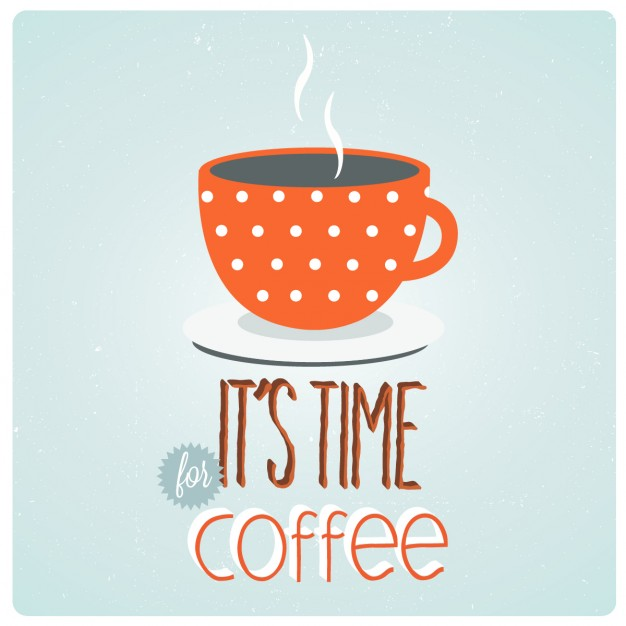


# 5. Analysis modules